
# Import of the Data:


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from yfinance.tickers import Ticker

Ticker_liste = ["BAC","PG","KO","JNJ","WHR"]

start_data = pd.DataFrame()

for i,v in enumerate(Ticker_liste):
  temp = yf.Ticker(v)
  start_data[v] = temp.history(start="2000-01-01",end="2021-12-31")["Close"]

In [ ]:
start_data

,BAC,PG,KO,JNJ,WHR
Date,,,,,
2000-01-03 00:00:00-05:00,13.251135,28.788445,14.781792,25.267591,33.011875
2000-01-04 00:00:00-05:00,12.464618,28.234499,14.798181,24.342527,31.743496
2000-01-05 00:00:00-05:00,12.601404,27.697330,14.929287,24.599468,32.210800
2000-01-06 00:00:00-05:00,13.678596,28.973085,14.945668,25.370363,32.477829
2000-01-07 00:00:00-05:00,13.319531,31.289581,15.928945,26.449585,32.577957
...,...,...,...,...,...
2021-12-23 00:00:00-05:00,42.788086,154.281631,55.692448,161.553009,212.352737
2021-12-27 00:00:00-05:00,43.000000,156.083664,56.103779,162.916458,215.482834
2021-12-28 00:00:00-05:00,43.057800,156.922012,56.323799,163.569412,215.585632


Lets caluculate the daily log returns for the following tasks:

In [ ]:
log_returns = start_data.apply(np.log).diff().dropna()
log_returns

,BAC,PG,KO,JNJ,WHR
Date,,,,,
2000-01-04 00:00:00-05:00,-0.061189,-0.019429,0.001108,-0.037298,-0.039179
2000-01-05 00:00:00-05:00,0.010914,-0.019209,0.008821,0.010500,0.014614
2000-01-06 00:00:00-05:00,0.082024,0.045031,0.001097,0.030857,0.008256
2000-01-07 00:00:00-05:00,-0.026601,0.076918,0.063716,0.041659,0.003078
2000-01-10 00:00:00-05:00,-0.035274,-0.004840,-0.032413,-0.025584,0.012220
...,...,...,...,...,...
2021-12-23 00:00:00-05:00,0.003157,0.004884,0.000687,0.001904,0.013021
2021-12-27 00:00:00-05:00,0.004940,0.011612,0.007359,0.008404,0.014633
2021-12-28 00:00:00-05:00,0.001343,0.005357,0.003914,0.004000,0.000477


# Four Moments:

## Four Moments - BAC:
- The Bank of America Corporation (BAC):

In [ ]:
mean_bac = log_returns[['BAC']].mean()
variance_bac = log_returns[['BAC']].var(ddof = 1)
skewness_bac = log_returns[['BAC']].skew()
kurtosis_bac = log_returns[['BAC']].kurtosis()

print(f'Estimated mean: {mean_bac.values[0]:.5f}')
print(f'Estimated variance: {variance_bac.values[0]:.5f}')
print(f'Estimated skewness: {skewness_bac.values[0]:.5f}')
print(f'Estimated excess-kurtosis: {kurtosis_bac.values[0]:.5f}')

Estimated mean: 0.00021
Estimated variance: 0.00082
Estimated skewness: -0.32967
Estimated excess-kurtosis: 26.33238


The following charts show the distribution of the returns
- In the Histogram the mean (red) and the standard deviation (black) are displayed with vertical lines
- the Graph on the right side visualizes the Density of the distribution of returns, which provides us with a better perspective on the skewness and kurtosis.

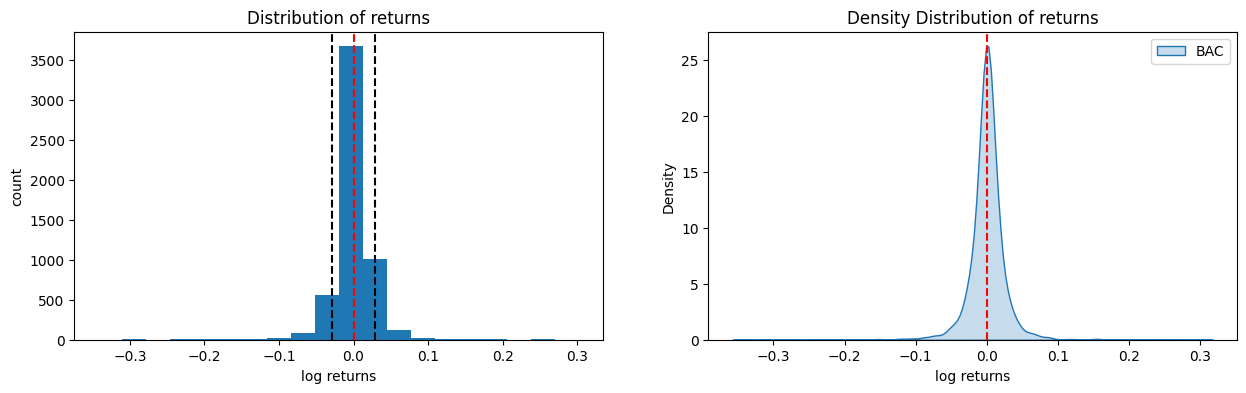

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 4))

sns.kdeplot(ax = axs[1], data=log_returns[["BAC"]], fill=True)
axs[1].set_xlabel('log returns')
axs[1].set_title('Density Distribution of returns')
axs[1].legend( ['BAC'])
axs[1].axvline(x=log_returns['BAC'].mean(), color='r', linestyle='--')



log_returns['BAC'].plot(ax = axs[0], kind = 'hist', bins = 20)
axs[0].set_title('Distribution of returns')
axs[0].axvline(x=log_returns['BAC'].mean(), color='r', linestyle='--')
axs[0].axvline(x=log_returns['BAC'].std(), color='k', linestyle='--')
axs[0].axvline(x=-log_returns['BAC'].std(), color='k', linestyle='--')
axs[0].set_xlabel('log returns')
axs[0].set_ylabel('count')


plt.show()

**Display of the four moments:**

The following charts display the four moments so that we can examine which time (Dates) influenced the 4 moments the most. We can see that the 4 moments of BAC are mainly shaped by the 2009 banking crisis

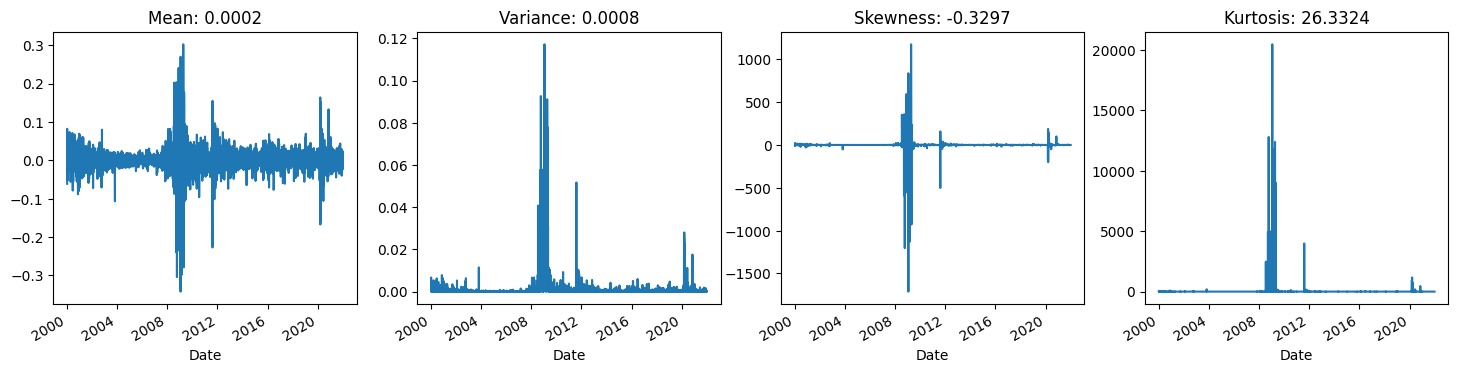

In [ ]:
fig, axs = plt.subplots(1, 4, figsize = (18, 4))

log_returns['BAC'].plot(ax = axs[0], legend = False)
m = np.mean(log_returns['BAC'].values)
m2_v = (log_returns['BAC'] - m)**2
m2_v.plot(ax = axs[1], legend = False)
m2 = np.mean(m2_v.values)
m3_v = ((log_returns['BAC'] - m) / np.sqrt(m2))**3
m3 = np.mean(m3_v.values)
m3_v.plot(ax = axs[2], legend = False)
m4_v = ((log_returns['BAC'] - m) / np.sqrt(m2))**4
m4 = np.mean(m4_v.values)
m4_v.plot(ax = axs[3], legend = False)

axs[0].set_title('Mean: {:.4f}'.format(mean_bac.item()))
axs[1].set_title('Variance: {:.4f}'.format(variance_bac.item()))
axs[2].set_title('Skewness: {:.4f}'.format(skewness_bac.item()))
axs[3].set_title('Kurtosis: {:.4f}'.format(kurtosis_bac.item()))

plt.show()

****Interpretation of the four moments for the Bank of America Corporation (BAC):****

 (with explanation of the terms which is also sufficient for the other companies)

**Mean:**
- The arithmetic mean of the returns which is usually close to
zero for every investment.
- The average daily return of the BAC is 0.0002. If we consider the distribution of the log returns, we can see great return fluctuations in the dotcom, covid and especially in the finance crisis.

**Variations/standard deviation:**
- Is the the average squared deviations from the mean.
- Low variance is associated with lower risk and usually with a lower return. A variance of 0.008 is rather low and indicates that the returns over time tend to be close to the mean. Although we can see a huge spike in the variance in the time of the financial crisis, which indicates a high volatility to this time. (minor spikes in covid and dotcom crisis, as well as in 2013)

**Skeweness:**
- The return distribution is left skewed because the Skweness (-0.33) is (slightly) negative. A negative value for skewness indicates that the tail is on the left side of the distribution, which extends towards more negative values. left-skewed distributions come along
with the risk that large negative returns appear with higher
probability than large positive returns.
The Skewness graph spcifies that we have many large negative and large positiv returns to the time of the financial crisis.

**Kurtosis:**
- If the Kutosis value (26.33) is greater then 3 the distribution is called leptocurtic. The "skinniness" of a leptokurtic distribution is a consequence of the outliers, which stretch the horizontal axis of the histogram graph, making the bulk of the data appear in a narrow ("skinny") vertical range. The "skinnieness" can be seen in the Density chart above. The Kurtosis chart indicates extreme returns during 2009.

Furthermore, the combination of negative skewness and large kurtosis tells us a higher potential for large losses exists in comparison to large gains.

## Four Moments - PG:
- The Procter & Gamble Company (PG)
  - consumer goods cooperation

In [ ]:
mean_PG = log_returns[['PG']].mean()
variance_PG = log_returns[['PG']].var(ddof = 1)
skewness_PG = log_returns[['PG']].skew()
kurtosis_PG = log_returns[['PG']].kurtosis()

print(f'Estimated mean: {mean_PG.values[0]:.4f}')
print(f'Estimated variance: {variance_PG.values[0]:.4f}')
print(f'Estimated skewness: {skewness_PG.values[0]:.4f}')
print(f'Estimated excess-kurtosis: {kurtosis_PG.values[0]:.4f}')

Estimated mean: 0.0003
Estimated variance: 0.0002
Estimated skewness: -3.4591
Estimated excess-kurtosis: 95.1088


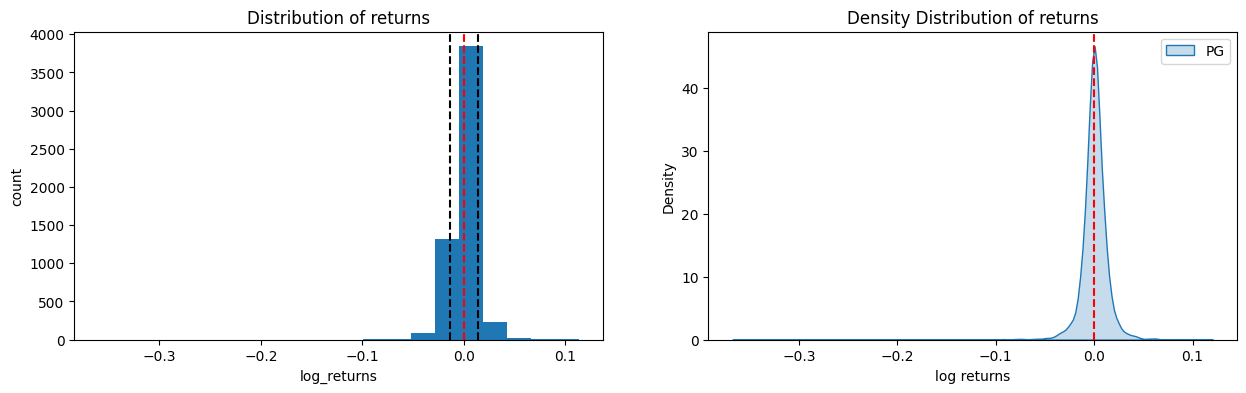

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 4))

sns.kdeplot(ax = axs[1], data=log_returns[["PG"]], fill=True)
axs[1].set_xlabel('log returns')
axs[1].set_title('Density Distribution of returns')
axs[1].axvline(x=log_returns['PG'].mean(), color='r', linestyle='--')



log_returns['PG'].plot(ax = axs[0], kind = 'hist', bins = 20)
axs[0].set_title('Distribution of returns')
axs[0].axvline(x = log_returns['PG'].mean(), color='r', linestyle='--')
axs[0].axvline(x = log_returns['PG'].std(), color='k', linestyle='--')
axs[0].axvline(x = -log_returns['PG'].std(), color='k', linestyle='--')
axs[0].set_xlabel('log_returns')
axs[0].set_ylabel('count')


plt.show()

**Display of the four moment:**

The following charts display the development of the four moments over time . Through this we see that the 4 moments are mainly shaped by the 2001 Dotcom crisis

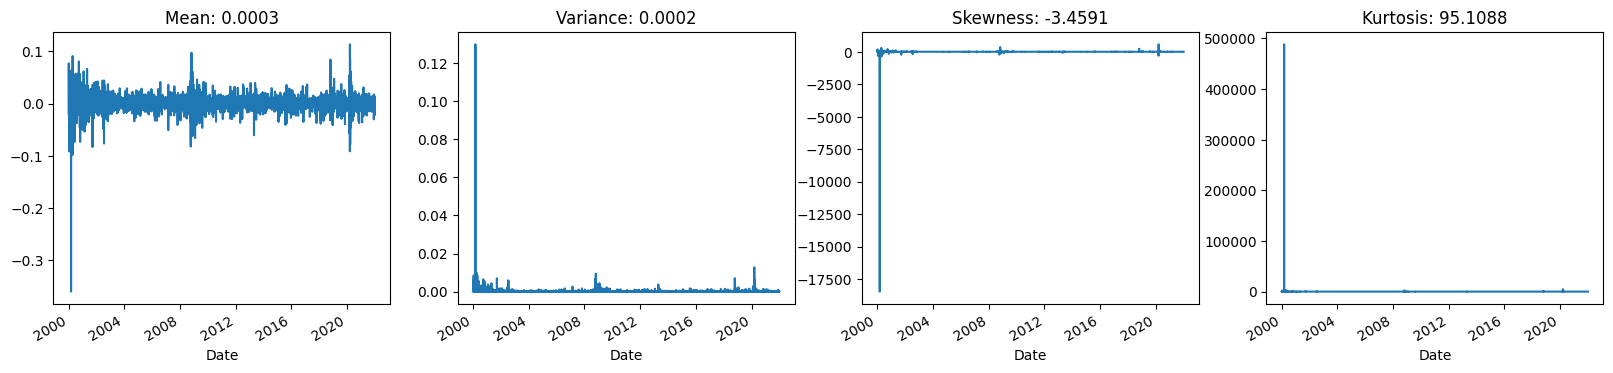

In [ ]:
fig, axs = plt.subplots(1, 4, figsize = (20, 4))

log_returns['PG'].plot(ax = axs[0], legend = False)
m = np.mean(log_returns['PG'].values)
m2_v = (log_returns['PG'] - m)**2
m2_v.plot(ax = axs[1], legend = False)
m2 = np.mean(m2_v.values)
m3_v = ((log_returns['PG'] - m) / np.sqrt(m2))**3
m3 = np.mean(m3_v.values)
m3_v.plot(ax = axs[2], legend = False)
m4_v = ((log_returns['PG'] - m) / np.sqrt(m2))**4
m4 = np.mean(m4_v.values)
m4_v.plot(ax = axs[3], legend = False)

axs[0].set_title('Mean: {:.4f}'.format(mean_PG.item()))
axs[1].set_title('Variance: {:.4f}'.format(variance_PG.item()))
axs[2].set_title('Skewness: {:.4f}'.format(skewness_PG.item()))
axs[3].set_title('Kurtosis: {:.4f}'.format(kurtosis_PG.item()))

plt.show()

****Interpretation of the four moments for the Procter & Gamble Company (PG):****

**Mean:**
-  The average daily return is 0.0003. The returns over time graph shows more extreme values during the dotcom (extrem), finance and covid time

**Variance/standard deviation:**
- A variance of 0.0002. In the graph for the variance we can see that during the dotcom crisis the deviation from the mean was particularly high. Smaller spikes in the variance appear for the finance and covid crisis.

**Skeweness:**
- The skewness of the PG returns is clearly left skewed because the Skweness (-3.46) is negative (explained already for BAC). We have a huge spike of negative values for the dotcom crisis.
The Density chart above displayes that there are clearly more big negative values then positive. We can also see that high positiv returns are not so likly compared to high negative returns

**Kurtosis:**
- If the Kurtosis value (95.11) is greater then 3 the distribution is called leptocurtic (explained for BAC already). In the Kurtosis Graph we also see that there is a huge spike in values around the dotcom crisis, which indicates many outlier values in this time.

## Four Moments - KO:
- The Coca-Cola Company (KO)

In [ ]:
mean_KO = log_returns[['KO']].mean()
variance_KO = log_returns[['KO']].var(ddof = 1)
skewness_KO = log_returns[['KO']].skew()
kurtosis_KO = log_returns[['KO']].kurtosis()

print(f'Estimated mean: {mean_KO.values[0]:.4f}')
print(f'Estimated variance: {variance_KO.values[0]:.4f}')
print(f'Estimated skewness: {skewness_KO.values[0]:.4f}')
print(f'Estimated excess-kurtosis: {kurtosis_KO.values[0]:.4f}')

Estimated mean: 0.0002
Estimated variance: 0.0002
Estimated skewness: -0.1716
Estimated excess-kurtosis: 9.2882


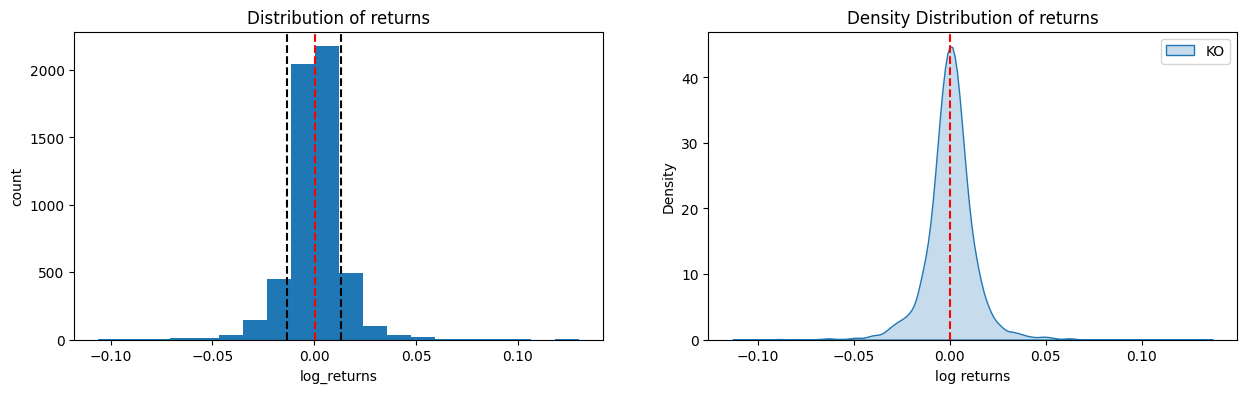

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 4))

sns.kdeplot(ax = axs[1], data=log_returns[["KO"]], fill=True)
axs[1].set_xlabel('log returns')
axs[1].set_title('Density Distribution of returns')
axs[1].axvline(x=log_returns['KO'].mean(), color='r', linestyle='--')



log_returns['KO'].plot(ax = axs[0], kind = 'hist', bins = 20)
axs[0].set_title('Distribution of returns')
axs[0].axvline(x=log_returns['KO'].mean(), color='r', linestyle='--')
axs[0].axvline(x=log_returns['KO'].std(), color='k', linestyle='--')
axs[0].axvline(x=-log_returns['KO'].std(), color='k', linestyle='--')
axs[0].set_xlabel('log_returns')
axs[0].set_ylabel('count')


plt.show()

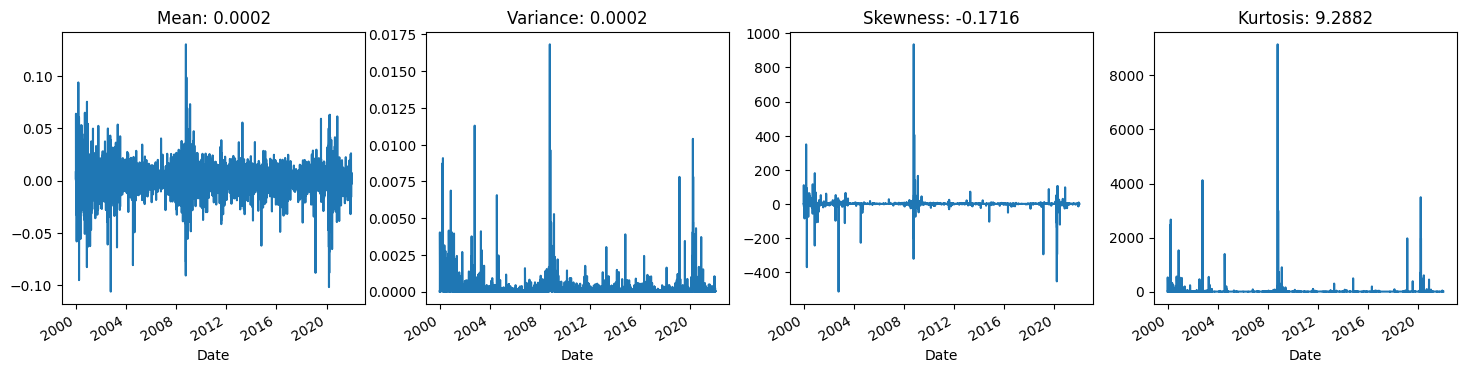

In [ ]:
fig, axs = plt.subplots(1, 4, figsize = (18, 4))

log_returns['KO'].plot(ax = axs[0], legend = False)
m = np.mean(log_returns['KO'].values)
m2_v = (log_returns['KO'] - m)**2
m2_v.plot(ax = axs[1], legend = False)
m2 = np.mean(m2_v.values)
m3_v = ((log_returns['KO'] - m) / np.sqrt(m2))**3
m3 = np.mean(m3_v.values)
m3_v.plot(ax = axs[2], legend = False)
m4_v = ((log_returns['KO'] - m) / np.sqrt(m2))**4
m4 = np.mean(m4_v.values)
m4_v.plot(ax = axs[3], legend = False)

axs[0].set_title('Mean: {:.4f}'.format(mean_KO.item()))
axs[1].set_title('Variance: {:.4f}'.format(variance_KO.item()))
axs[2].set_title('Skewness: {:.4f}'.format(skewness_KO.item()))
axs[3].set_title('Kurtosis: {:.4f}'.format(kurtosis_KO.item()))

plt.show()

**Interpretation of the four moments for the Coca-Kola Company (KO):**

**Mean:**
- The average daily return is 0.0002. We can see great return fluctuations in the dotcom, covid and finance crisis. In the no - crisis periods we also have flucations in the stock price


**Variations/standard deviation:**
- A variance of 0.0002, we can see spikes in variance throughout the timeline, which indicates fluctuations in variance. Higher spiked for dinance andcovid crisis (considering the small scale).

**Skeweness:**
- PG is slightly left skewed because the Skweness (-0.1716) is (slightly) negative (close to symmatrical). The Skewness graph spcifies that we have many large negative and large positiv values to the time of the financial crisis and small spikes in the covid and dotcom crisis.


**Kurtosis:**
- If the Kutosis value (9.29) is greater then 3 the distribution is called leptocurtic (explained above). The Kurtosis is driven by extreme values during 2009.
Furthermore we have more extreme values during the dotcom and covid crisis.

## Four Moments - JNJ:
- Johnson & Johnson (JNJ)

In [ ]:
mean_JNJ = log_returns[['JNJ']].mean()
variance_JNJ = log_returns[['JNJ']].var(ddof = 1)
skewness_JNJ = log_returns[['JNJ']].skew()
kurtosis_JNJ = log_returns[['JNJ']].kurtosis()

print(f'Estimated mean: {mean_JNJ.values[0]:.4f}')
print(f'Estimated variance: {variance_JNJ.values[0]:.4f}')
print(f'Estimated skewness: {skewness_JNJ.values[0]:.4f}')
print(f'Estimated excess-kurtosis: {kurtosis_JNJ.values[0]:.4f}')

Estimated mean: 0.0003
Estimated variance: 0.0002
Estimated skewness: -0.5273
Estimated excess-kurtosis: 14.8012


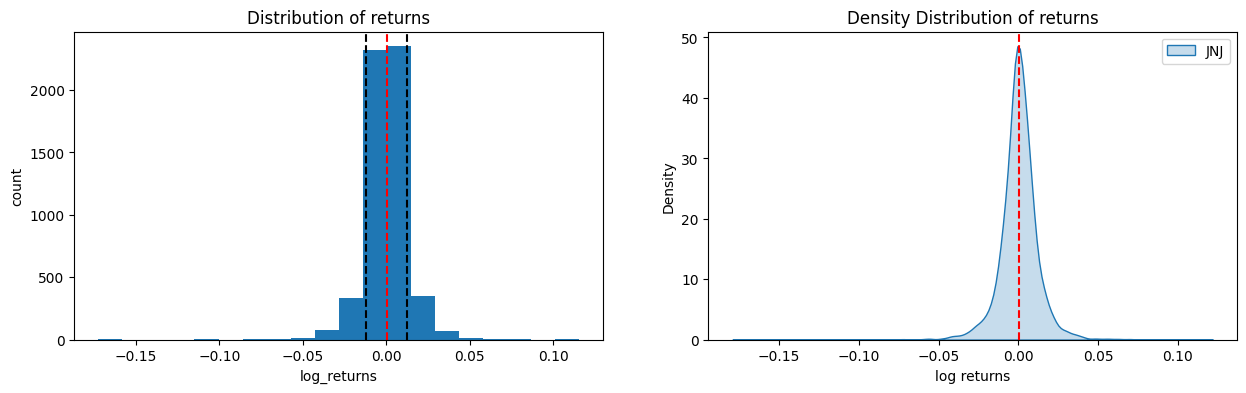

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 4))

sns.kdeplot(ax = axs[1], data=log_returns[["JNJ"]], fill=True)
axs[1].set_xlabel('log returns')
axs[1].set_title('Density Distribution of returns')
axs[1].axvline(x=log_returns['JNJ'].mean(), color='r', linestyle='--')



log_returns['JNJ'].plot(ax = axs[0], kind = 'hist', bins = 20)
axs[0].set_title('Distribution of returns')
axs[0].axvline(x=log_returns['JNJ'].mean(), color='r', linestyle='--')
axs[0].axvline(x=log_returns['JNJ'].std(), color='k', linestyle='--')
axs[0].axvline(x=-log_returns['JNJ'].std(), color='k', linestyle='--')
axs[0].set_xlabel('log_returns')
axs[0].set_ylabel('count')


plt.show()

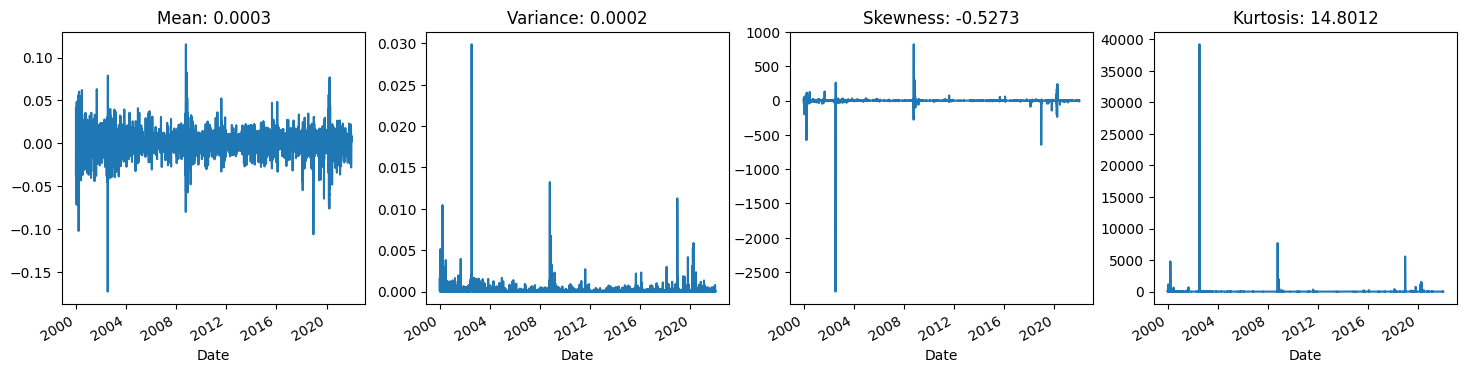

In [ ]:
fig, axs = plt.subplots(1, 4, figsize = (18, 4))

log_returns['JNJ'].plot(ax = axs[0], legend = False)
m = np.mean(log_returns['JNJ'].values)
m2_v = (log_returns['JNJ'] - m)**2
m2_v.plot(ax = axs[1], legend = False)
m2 = np.mean(m2_v.values)
m3_v = ((log_returns['JNJ'] - m) / np.sqrt(m2))**3
m3 = np.mean(m3_v.values)
m3_v.plot(ax = axs[2], legend = False)
m4_v = ((log_returns['JNJ'] - m) / np.sqrt(m2))**4
m4 = np.mean(m4_v.values)
m4_v.plot(ax = axs[3], legend = False)

axs[0].set_title('Mean: {:.4f}'.format(mean_JNJ.item()))
axs[1].set_title('Variance: {:.4f}'.format(variance_JNJ.item()))
axs[2].set_title('Skewness: {:.4f}'.format(skewness_JNJ.item()))
axs[3].set_title('Kurtosis: {:.4f}'.format(kurtosis_JNJ.item()))

plt.show()

**Interpretation of the four moments for the Johnson & Johnson  (JNJ):**

**Mean:**
- The average daily return is 0.0003. We can see great return fluctuations in the dotcom, covid and finance crisis. In the no - crisis periods we also have flucations in the returns, especially in 2003.

**Variations/standard deviation:**
-  A variance of 0.002. When we look at the variance graph, we can see spikes for the crisis periods (dotcom, finance, covid) and spikes in the year 2003.


**Skeweness:**
- The returns of JNJ are slightly left skewed because the Skweness (-0.5273) is (slightly) negative.
The Skewness is shaped by the financial, covid and dotcom crisis, as well as in 2003.

**Kurtosis:**
- The Kutosis value is (14.8012) = leptokurtic (explained above). The Kurtosis is driven by extreme values during 2003. Furthermore we have more extreme values during the dotcom and covid crisis.

## Four Moments - WHR:
- Whirlpool Corporation (WHR)

In [ ]:
mean_WHR = log_returns[['WHR']].mean()
variance_WHR = log_returns[['WHR']].var(ddof = 1)
skewness_WHR = log_returns[['WHR']].skew()
kurtosis_WHR = log_returns[['WHR']].kurtosis()

print(f'Estimated mean: {mean_WHR.values[0]:.4f}')
print(f'Estimated variance: {variance_WHR.values[0]:.4f}')
print(f'Estimated skewness: {skewness_WHR.values[0]:.4f}')
print(f'Estimated excess-kurtosis: {kurtosis_WHR.values[0]:.4f}')

Estimated mean: 0.0003
Estimated variance: 0.0006
Estimated skewness: -0.0090
Estimated excess-kurtosis: 8.5382


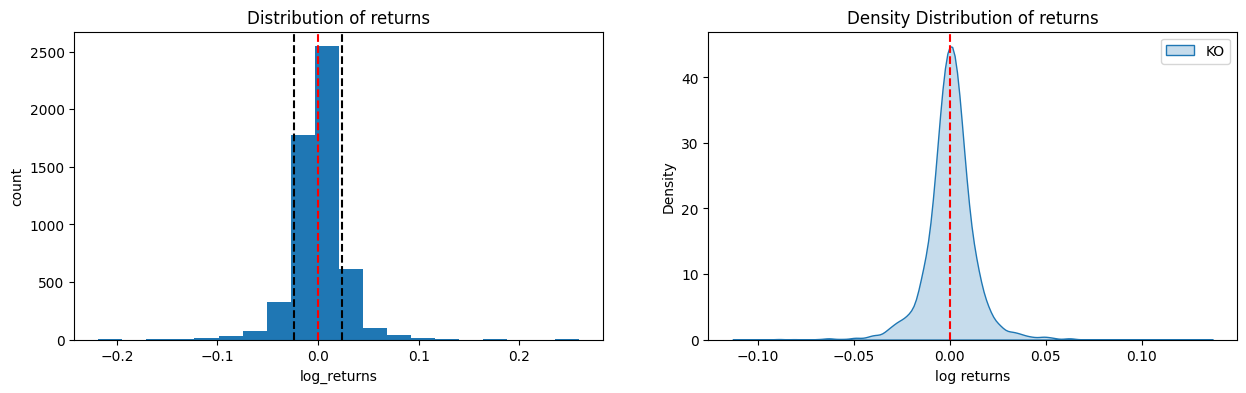

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 4))

sns.kdeplot(ax = axs[1], data=log_returns[["KO"]], fill=True)
axs[1].set_xlabel('log returns')
axs[1].set_title('Density Distribution of returns')
axs[1].axvline(x=log_returns['WHR'].mean(), color='r', linestyle='--')



log_returns['WHR'].plot(ax = axs[0], kind = 'hist', bins = 20)
axs[0].set_title('Distribution of returns')
axs[0].axvline(x=log_returns['WHR'].mean(), color='r', linestyle='--')
axs[0].axvline(x=log_returns['WHR'].std(), color='k', linestyle='--')
axs[0].axvline(x=-log_returns['WHR'].std(), color='k', linestyle='--')
axs[0].set_xlabel('log_returns')
axs[0].set_ylabel('count')


plt.show()

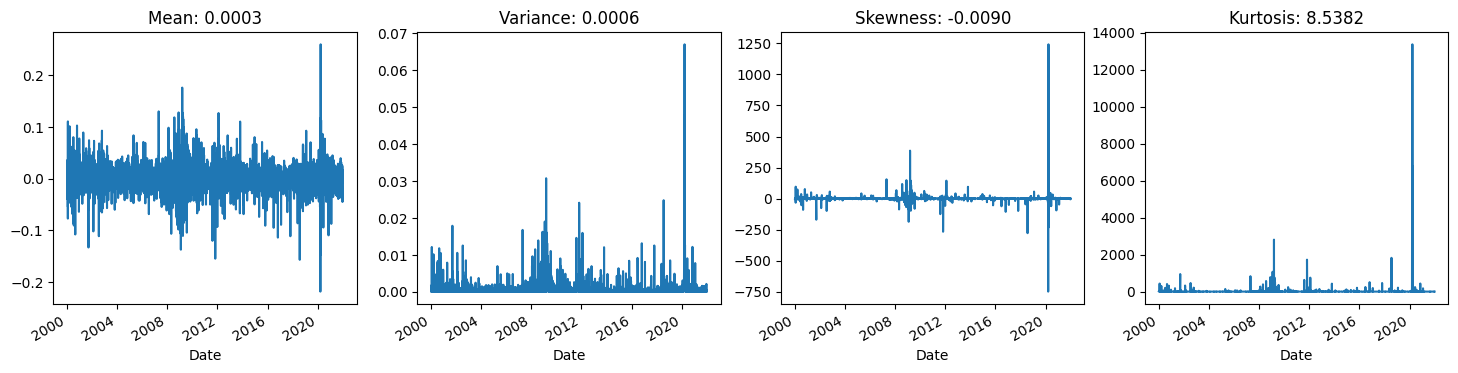

In [ ]:
fig, axs = plt.subplots(1, 4, figsize = (18, 4))

log_returns['WHR'].plot(ax = axs[0], legend = False)
m = np.mean(log_returns['WHR'].values)
m2_v = (log_returns['WHR'] - m)**2
m2_v.plot(ax = axs[1], legend = False)
m2 = np.mean(m2_v.values)
m3_v = ((log_returns['WHR'] - m) / np.sqrt(m2))**3
m3 = np.mean(m3_v.values)
m3_v.plot(ax = axs[2], legend = False)
m4_v = ((log_returns['WHR'] - m) / np.sqrt(m2))**4
m4 = np.mean(m4_v.values)
m4_v.plot(ax = axs[3], legend = False)

axs[0].set_title('Mean: {:.4f}'.format(mean_WHR.item()))
axs[1].set_title('Variance: {:.4f}'.format(variance_WHR.item()))
axs[2].set_title('Skewness: {:.4f}'.format(skewness_WHR.item()))
axs[3].set_title('Kurtosis: {:.4f}'.format(kurtosis_WHR.item()))

plt.show()

**Interpretation of the four moments for the Whirlpool Corporation (WHR):**

**Mean:**
- This idicates that the average daily return is 0.0003. Considering the distribution of the log returns we see the usual clustering around crisis periods with a extrem spike in the covid crisis.

**Variations/standard deviation:**
- Variance = 0.0006. When we look at the variance graph, we can see spikes in variance throughout the timeline, which indicates higher fluctuations in returns. The variance is also shaped by the covid crisis.

**Skeweness:**
- The returns of WHR are slightly left skewed because of the Skweness (-0.0090), the distribution is close to being symmetrical. The Skewness is mainly shaped by the covid crisis and financial crisis.

**Kurtosis:**
- The Kutosis value (14.8012) is called leptocurtic (explained above). We see most extreme values during the covid crisis.

## Sum-Up

Overall we can say that the 5 stocks have similiar values when it comes to the four moments (left skewed and leptocurtic with a small positive mean and variance). If we look at the four moments individuelly it becomes visible that the crisis periods have a huge impact on the values of the four moments.

For all stocks, the first two moments made the volatility clustering of real
log-returns visible
The different behavior over time indicates that time-specific
modeling seems suited for log-returns, which will be the handled in the next chapter.


# Time Conditional Behavior:

Task 3:

## Alpha:

"In order to get an impression about the degree of time-variation for the mean and the variance, we may estimate them with different weightings for each realization, hereby, give higher weights to more recent observations."


- "The higher α the more weight is given to the current observations. There is no
clear rule which value should be used for α, so it may be best to evaluate this
for a given data set."

I set the alpha to 0.2, This means that 80 % of the past returns are included in the ewma calculation. The follwong chart shows the specific weight distribution for the different timsteps.
- Interpretation: The last 21 trading-days are included in 99,3 % of the calculation of the ewma value of "today". (One trading month)

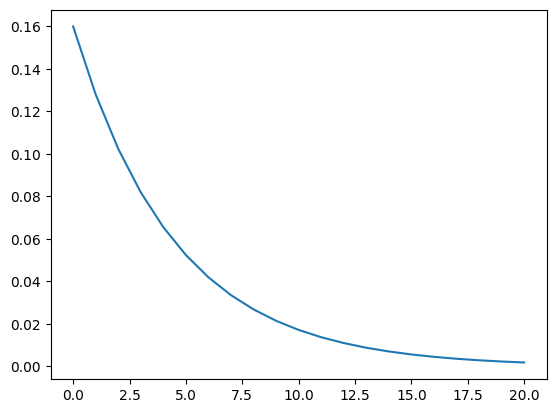

In [ ]:
import matplotlib.pylab as plt

alpha = 0.2
time_steps = list(range(21))

plt.plot(time_steps, [alpha*(1-alpha)**(t+1) for t in time_steps])

In [ ]:
sum([alpha*(1-alpha)**(t+1) for t in time_steps]) + 0.2 # + 0.2 because we start with t = 1 and not with t = 0

0.9926213023705164

In [ ]:
# min_periods = 21 because we only want EWMA values that include an sufficient amount of values.

log_mean_ewma = log_returns.ewm(alpha = 0.2, min_periods = 21, adjust=True).mean().dropna()

log_var_ewma = log_returns.ewm(alpha=0.2, min_periods = 21, adjust=True).var().dropna()

In [ ]:
log_mean_ewma

,BAC,PG,KO,JNJ,WHR
Date,,,,,
2000-02-02 00:00:00-05:00,0.001475,-0.008588,-0.013486,-0.001062,-0.002433
2000-02-03 00:00:00-05:00,-0.004438,-0.008524,-0.014830,-0.005776,-0.002161
2000-02-04 00:00:00-05:00,-0.005997,-0.013209,-0.008238,-0.007502,-0.005920
2000-02-07 00:00:00-05:00,-0.007271,-0.013761,-0.004362,-0.007684,-0.007648
2000-02-08 00:00:00-05:00,0.002063,-0.005687,-0.002386,-0.004606,-0.010450
...,...,...,...,...,...
2021-12-23 00:00:00-05:00,0.001293,0.003473,0.002833,0.000637,0.000362
2021-12-27 00:00:00-05:00,0.002022,0.005101,0.003738,0.002190,0.003216
2021-12-28 00:00:00-05:00,0.001886,0.005152,0.003773,0.002552,0.002668


In [ ]:
log_var_ewma

,BAC,PG,KO,JNJ,WHR
Date,,,,,
2000-02-02 00:00:00-05:00,0.001381,0.000907,0.000916,0.000846,0.002122
2000-02-03 00:00:00-05:00,0.001258,0.000724,0.000739,0.000775,0.001694
2000-02-04 00:00:00-05:00,0.001015,0.000676,0.000785,0.000632,0.001416
2000-02-07 00:00:00-05:00,0.000818,0.000542,0.000694,0.000505,0.001144
2000-02-08 00:00:00-05:00,0.001044,0.000725,0.000572,0.000446,0.000949
...,...,...,...,...,...
2021-12-23 00:00:00-05:00,0.000270,0.000102,0.000102,0.000123,0.000498
2021-12-27 00:00:00-05:00,0.000219,0.000094,0.000085,0.000109,0.000435
2021-12-28 00:00:00-05:00,0.000175,0.000075,0.000068,0.000088,0.000349


## Auto-correlation:
proof that autocorrelation exists for the chosen stocks ( time conditional estimates differ from unconditional estimates):

-  "you may interpret unconditional
estimates such as ˆµ, σˆ as what happens on average over time
and time specific estimates ˆµt
, σˆt as what happens currently,
given current information and history"

- "This makes only sense in the presence of auto-correlation in
returns and squared returns, because unconditional and
conditional estimates are the same if values are uncorrelated
over time"

In [ ]:
# for lags up to h = 20
# check the presence of auto-correlation
from statsmodels.tsa.stattools import acf

max_autocorr = log_returns.apply(lambda x: np.max(np.abs(acf(x, nlags = 20, fft = True))[1:]))

max_autocorr

BAC    0.077041
PG     0.070440
KO     0.039752
JNJ    0.059718
WHR    0.060133
dtype: float64

In [ ]:
max_autocorr_abs = log_returns.abs().apply(lambda x: np.max(np.abs(acf(x, nlags = 20, fft = True))[1:]))
max_autocorr_abs

BAC    0.458588
PG     0.264176
KO     0.328093
JNJ    0.306089
WHR    0.251332
dtype: float64

Fisrtly I take my "log_mean_ewma" where my EWMAs are stored and seperate it in "new" Dataframes which only contain the values which are in the time span for the respective crisis/non-crisis period. (I do the same for the variance)

- **Important:** I delay the start time of the periods for exactly one month (21 trading days) to make sure that the EWMA values included in the comparison part are really considering values of the crisis periods/non-crisis periods.
- for the exact dates I used: https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions

In [ ]:
# unconditional mean for every company
uncon_mean = log_returns.mean()
uncon_var = log_returns.var()

In [ ]:
# creating periods for normal log_returns:
# the first 21 trading day ARE included because its no EWMA calculation
log_pre_dotcom = log_returns.loc["2000-01-01":"2001-02-01"]
log_dotcom = log_returns.loc["2001-03-01":"2001-11-30"]
log_post_dotcom = log_returns.loc["2001-12-01":"2007-11-30"]
log_finance = log_returns.loc["2007-12-01":"2009-06-30"]
log_post_finance = log_returns.loc["2009-07-01":"2020-01-31"]
log_corona = log_returns.loc["2020-02-01":"2020-04-30"]
log_post_corona = log_returns.loc["2020-05-01":"2021-12-30"]
log_standard = log_returns

In [ ]:
# creating periods for the EWMA Mean:
# the first 21 trading days of the period ARE NOT included because its an EWMA calculation
log_ewma_pre_dotcom = log_mean_ewma.loc["2000-01-01":"2001-02-01"]
log_ewma_dotcom = log_mean_ewma.loc["2001-04-01":"2001-11-30"]
log_ewma_post_dotcom = log_mean_ewma.loc["2002-01-01":"2007-11-30"]
log_ewma_finance = log_mean_ewma.loc["2008-01-01":"2009-06-30"]
log_ewma_post_finance = log_mean_ewma.loc["2009-08-01":"2020-01-31"]
log_ewma_corona = log_mean_ewma.loc["2020-03-01":"2020-04-30"]
log_ewma_post_corona = log_mean_ewma.loc["2020-06-01":"2021-12-30"]
log_ewma_standard = log_mean_ewma

In [ ]:
# creating periods for the EWMA Variance:
# the first 21 trading days of the period ARE NOT included because its an EWMA calculation
log_var_ewma_pre_dotcom = log_var_ewma.loc["2000-01-01":"2001-02-01"]
log_var_ewma_dotcom = log_var_ewma.loc["2001-04-01":"2001-11-30"]
log_var_ewma_post_dotcom = log_var_ewma.loc["2002-01-01":"2007-11-30"]
log_var_ewma_finance = log_var_ewma.loc["2008-01-01":"2009-06-30"]
log_var_ewma_post_finance = log_var_ewma.loc["2009-08-01":"2020-01-31"]
log_var_ewma_corona = log_var_ewma.loc["2020-03-01":"2020-04-30"]
log_var_ewma_post_corona = log_var_ewma.loc["2020-06-01":"2021-12-30"]
log_var_ewma_standard = log_var_ewma

### Mean Comaprison:
- In this section i want to compare the unconditional and conditional estimates of the mean.

I start with creating dataframes which include the important data.

In [ ]:
# DF: normal calculated mean for each period and each company
mean_df = pd.DataFrame({'Mean BAC': [log_pre_dotcom['BAC'].mean(), log_dotcom['BAC'].mean(), log_post_dotcom['BAC'].mean(),log_finance['BAC'].mean(),log_post_finance['BAC'].mean(), log_corona['BAC'].mean(), log_post_corona['BAC'].mean() ],
                   'Mean PG': [log_pre_dotcom['PG'].mean(),log_dotcom['PG'].mean(), log_post_dotcom['PG'].mean(),log_finance['PG'].mean(),log_post_finance['PG'].mean(), log_corona['PG'].mean(), log_post_corona['PG'].mean() ],
                   'Mean KO': [log_pre_dotcom['KO'].mean(),log_dotcom['KO'].mean(), log_post_dotcom['KO'].mean(),log_finance['KO'].mean(),log_post_finance['KO'].mean(), log_corona['KO'].mean(), log_post_corona['KO'].mean() ],
                   'Mean JNJ': [log_pre_dotcom['JNJ'].mean(),log_dotcom['JNJ'].mean(), log_post_dotcom['JNJ'].mean(),log_finance['JNJ'].mean(),log_post_finance['JNJ'].mean(), log_corona['JNJ'].mean(), log_post_corona['JNJ'].mean() ],
                   'Mean WHR':[log_pre_dotcom['WHR'].mean(),log_dotcom['WHR'].mean(), log_post_dotcom['WHR'].mean(),log_finance['WHR'].mean(),log_post_finance['WHR'].mean(), log_corona['WHR'].mean(), log_post_corona['WHR'].mean() ]},
                  index=['Pre Dotcom','Dotcom', 'Post Dotcom', 'Finance', 'Post Finance', 'Corona', 'Post Corona'])
mean_df

,Mean BAC,Mean PG,Mean KO,Mean JNJ,Mean WHR
Pre Dotcom,0.000510,-0.001275,0.000116,0.000117,-0.000488
Dotcom,0.001115,0.000591,-0.000567,0.001009,0.001246
Post Dotcom,0.000430,0.000512,0.000276,0.000179,0.000227
Finance,-0.002909,-0.000835,-0.000529,-0.000329,-0.001484
Post Finance,0.000382,0.000461,0.000455,0.000481,0.000561
Corona,-0.004917,-0.000791,-0.003747,0.000229,-0.004191
Post Corona,0.001556,0.000854,0.000721,0.000436,0.001859


In [ ]:
# DF: with the min values of the EWMA of the respective Period and Company
ewma_min = pd.DataFrame({'EMA Min BAC': [log_ewma_pre_dotcom['BAC'].min(), log_ewma_dotcom['BAC'].min(), log_ewma_post_dotcom['BAC'].min(),log_ewma_finance['BAC'].min(),log_ewma_post_finance['BAC'].min(), log_ewma_corona['BAC'].min(), log_ewma_post_corona['BAC'].min() ],
                   'EMA Min PG': [log_ewma_pre_dotcom['PG'].min(),log_ewma_dotcom['PG'].min(), log_ewma_post_dotcom['PG'].min(),log_ewma_finance['PG'].min(),log_ewma_post_finance['PG'].min(), log_ewma_corona['PG'].min(), log_ewma_post_corona['PG'].min() ],
                   'EMA Min KO': [log_ewma_pre_dotcom['KO'].min(),log_ewma_dotcom['KO'].min(), log_ewma_post_dotcom['KO'].min(),log_ewma_finance['KO'].min(),log_ewma_post_finance['KO'].min(), log_ewma_corona['KO'].min(), log_ewma_post_corona['KO'].min() ],
                   'EMA Min JNJ': [log_ewma_pre_dotcom['JNJ'].min(),log_ewma_dotcom['JNJ'].min(), log_ewma_post_dotcom['JNJ'].min(),log_ewma_finance['JNJ'].min(),log_ewma_post_finance['JNJ'].min(), log_ewma_corona['JNJ'].min(), log_ewma_post_corona['JNJ'].min() ],
                   'EMA Min WHR':[log_ewma_pre_dotcom['WHR'].min(),log_ewma_dotcom['WHR'].min(), log_ewma_post_dotcom['WHR'].min(),log_ewma_finance['WHR'].min(),log_ewma_post_finance['WHR'].min(), log_ewma_corona['WHR'].min(), log_ewma_post_corona['WHR'].min() ]},
                  index=['Pre Dotcom', 'Dotcom', 'Post Dotcom', 'Finance', 'Post Finance', 'Corona', 'Post Corona'])
ewma_min

,EMA Min BAC,EMA Min PG,EMA Min KO,EMA Min JNJ,EMA Min WHR
Pre Dotcom,-0.028055,-0.074796,-0.019978,-0.019934,-0.029593
Dotcom,-0.020942,-0.020630,-0.009949,-0.009411,-0.038617
Post Dotcom,-0.023498,-0.022397,-0.027109,-0.038937,-0.027227
Finance,-0.139866,-0.023461,-0.034069,-0.026749,-0.046380
Post Finance,-0.070510,-0.015044,-0.015532,-0.021091,-0.033463
Corona,-0.051630,-0.029945,-0.041985,-0.031830,-0.076238
Post Corona,-0.020230,-0.007009,-0.011195,-0.009422,-0.016051


In [ ]:
# DF: contains the overall Mean in every row (needed to display in plotly Graph)
uncon_mean_data = pd.DataFrame({'All time Mean BAC': [uncon_mean['BAC'], uncon_mean['BAC'], uncon_mean['BAC'],uncon_mean['BAC'],uncon_mean['BAC'], uncon_mean['BAC'], uncon_mean['BAC'] ],
                   'All time Mean PG': [uncon_mean['PG'],uncon_mean['PG'], uncon_mean['PG'],uncon_mean['PG'],uncon_mean['PG'], uncon_mean['PG'], uncon_mean['PG'] ],
                   'All time Mean KO': [uncon_mean['KO'],uncon_mean['KO'], uncon_mean['KO'],uncon_mean['KO'],uncon_mean['KO'], uncon_mean['KO'], uncon_mean['KO'] ],
                   'All time Mean JNJ': [uncon_mean['JNJ'],uncon_mean['JNJ'], uncon_mean['JNJ'],uncon_mean['JNJ'],uncon_mean['JNJ'], uncon_mean['JNJ'], uncon_mean['JNJ'] ],
                   'All time Mean WHR':[uncon_mean['WHR'],uncon_mean['WHR'], uncon_mean['WHR'],uncon_mean['WHR'],uncon_mean['WHR'], uncon_mean['WHR'], uncon_mean['WHR'] ]},
                  index=['Pre Dotcom','Dotcom', 'Post Dotcom', 'Finance', 'Post Finance', 'Corona', 'Post Corona'])
uncon_mean_data

,All time Mean BAC,All time Mean PG,All time Mean KO,All time Mean JNJ,All time Mean WHR
Pre Dotcom,0.000212,0.000306,0.000241,0.00034,0.000341
Dotcom,0.000212,0.000306,0.000241,0.00034,0.000341
Post Dotcom,0.000212,0.000306,0.000241,0.00034,0.000341
Finance,0.000212,0.000306,0.000241,0.00034,0.000341
Post Finance,0.000212,0.000306,0.000241,0.00034,0.000341
Corona,0.000212,0.000306,0.000241,0.00034,0.000341
Post Corona,0.000212,0.000306,0.000241,0.00034,0.000341


In [ ]:
# DF with EWMA Min data and with "normal" mean data for every stock and every period, as well as all time mean values for every period.
merged = ewma_min.merge(mean_df, left_index=True, right_index=True)
merged = merged.dropna(axis=0)
merged2 = merged.merge(uncon_mean_data, left_index=True, right_index=True)

The following graph should compare conditional estimates (EWMA) and unconditional estimates. You can choose the respective company via the dropdown menu. By clicking on the description of the legend you can add/remove the information you like.

Each Plot contains:

- the minimum value of the EWMA of the respective period

- the mean of the log returns of the respective period

- and a line for the all time mean of the log returns


In [ ]:
import yfinance as yf

import pandas as pd
import plotly.graph_objects as go

df_stocks = merged2

fig = go.Figure()

for column in df_stocks.columns.to_list():

  fig.add_trace(
        go.Scatter(
            x = df_stocks.index,
            y = df_stocks[column],
            name = column
        ))

fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True, True, True, True]},
                          {'title': 'All',
                           'showlegend':True}]),
             dict(label = 'BAC',
                  method = 'update',
                  args = [{'visible': [True, False, False, False, False , True, False, False, False, False, True, False, False, False, False]},
                          {'title': 'BAC', 'showlegend':True}]),

             dict(label = 'PG',
                  method = 'update',
                  args = [{'visible': [False, True, False, False, False , False, True, False, False, False,False, True, False, False, False]},
                          {'title': 'PG',
                           'showlegend':True}]),

             dict(label = 'KO',
                  method = 'update',
                  args = [{'visible': [False, False, True, False, False , False, False, True, False, False, False, False, True, False, False]},
                          {'title': 'KO',
                           'showlegend':True}]),

             dict(label = 'JNJ',
                  method = 'update',
                  args = [{'visible': [False, False, False, True, False , False, False, False, True, False, False, False, False, True, False]},
                          {'title': 'JNJ',
                           'showlegend':True}]),
             dict(label = 'WHR',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, True , False, False, False, False, True, False, False, False, False, True]},
                          {'title': 'WHR',
                           'showlegend':True}]),
            ])
        )
    ])

fig.show()

**Interpretation**:

- in the "Mean Comparison" part we compare the (unconditonal estimate) all time mean of a stock and the mean of the respective time period with the minimum EWMA mean of the respective time period. I take the minimum of the EWMA mean of a period to demonstrate the differences to the unconditional mean. Basically the objective of this comparison is to see that the unconditional mean is not able to display the depths of a crisis while the minimum EWMA displayes the peak of a crisis more clearly.

- **Findings:** the worest conditional mean in a crisis/non-crisis period is clearly below the unconditional mean! The differences between crisis and no-crisis period are explained below.
 - we can note that the unconditional mean, where every datapoint is weighted equally, cannot display a crisis properly (at all). On the other hand the mean over the respective period indicates the development of crisis/no-crisis periods. Compared to the unconditonal estimate the minimum EWMA mean displayes the periods more realistically, because it puts more weight on recent returns. This way we can see what we really should anticipate during certain crisis periods.


**Crisis vs Non-Crisis:**

- *Its visible that in most crisis periods the worest conditional mean is lower then in non-crisis periods.*
- But lets keep in mind that periods affected the companies and sectors differently.
 - e.g. the effect of the dotcom crisis wasnt so impactful because the chosen stocks arent tech companies.

 - e.g. if we consider the "BAC", the financial crisis (Banking crisis) had a huge impact to the conditional mean (compared to the unconditional mean). On the other hand the Dotcom and Corona crisis weren´t so impactful to the Bank of America. If we now take a look on the WHR, we can see that in every crisis the minimun value of the EWMA dropped (deepest in the covid crisis). Its also displayed that the minimun EWMA mean recovered during no-crisis periods.

 - e.g. PG on the other hand was in a individual crisis in the "Pre Dotcom" period and rather smoth throughout the rest of the periods.



### Variance Comparison:
- In this section I want to compare the unconditional and conditional estimates of the varaince.
- The procedure is identical to the "Mean Comparison" except that we look at the variance.

In [ ]:
# DF: contains every "normal" Variance for every Period and Every Stock
var_df = pd.DataFrame({'Mean BAC': [log_pre_dotcom['BAC'].var(), log_dotcom['BAC'].var(), log_post_dotcom['BAC'].var(),log_finance['BAC'].var(),log_post_finance['BAC'].var(), log_corona['BAC'].var(), log_post_corona['BAC'].var() ],
                   'Mean PG': [log_pre_dotcom['PG'].var(),log_dotcom['PG'].var(), log_post_dotcom['PG'].var(),log_finance['PG'].var(),log_post_finance['PG'].var(), log_corona['PG'].var(), log_post_corona['PG'].var() ],
                   'Mean KO': [log_pre_dotcom['KO'].var(),log_dotcom['KO'].var(), log_post_dotcom['KO'].var(),log_finance['KO'].var(),log_post_finance['KO'].var(), log_corona['KO'].var(), log_post_corona['KO'].var() ],
                   'Mean JNJ': [log_pre_dotcom['JNJ'].var(),log_dotcom['JNJ'].var(), log_post_dotcom['JNJ'].var(),log_finance['JNJ'].var(),log_post_finance['JNJ'].var(), log_corona['JNJ'].var(), log_post_corona['JNJ'].var() ],
                   'Mean WHR':[log_pre_dotcom['WHR'].var(),log_dotcom['WHR'].var(), log_post_dotcom['WHR'].var(),log_finance['WHR'].var(),log_post_finance['WHR'].var(), log_corona['WHR'].var(), log_post_corona['WHR'].var() ]},
                  index=['Pre Dotcom','Dotcom', 'Post Dotcom', 'Finance', 'Post Finance', 'Corona', 'Post Corona'])
var_df

,Mean BAC,Mean PG,Mean KO,Mean JNJ,Mean WHR
Pre Dotcom,0.000839,0.001158,0.000680,0.000436,0.000901
Dotcom,0.000448,0.000276,0.000238,0.000205,0.000608
Post Dotcom,0.000157,0.000105,0.000130,0.000145,0.000354
Finance,0.006085,0.000346,0.000417,0.000280,0.001737
Post Finance,0.000434,0.000089,0.000087,0.000088,0.000438
Corona,0.003471,0.001396,0.001319,0.001153,0.004398
Post Corona,0.000452,0.000094,0.000145,0.000098,0.000431


In [ ]:
# DF: contains the max EWMA Variance for every period and for every stock
ewma_var_max = pd.DataFrame({'EWMA VAR BAC': [log_var_ewma_pre_dotcom['BAC'].max(), log_var_ewma_dotcom['BAC'].max(), log_var_ewma_post_dotcom['BAC'].max(),log_var_ewma_finance['BAC'].max(),log_var_ewma_post_finance['BAC'].max(), log_var_ewma_corona['BAC'].max(), log_var_ewma_post_corona['BAC'].max() ],
                   'EWMA VAR PG': [log_var_ewma_pre_dotcom['PG'].max(), log_var_ewma_dotcom['PG'].max(), log_var_ewma_post_dotcom['PG'].max(),log_var_ewma_finance['PG'].max(),log_var_ewma_post_finance['PG'].max(), log_var_ewma_corona['PG'].max(), log_var_ewma_post_corona['PG'].max() ],
                   'EWMA VAR KO': [log_var_ewma_pre_dotcom['KO'].max(), log_var_ewma_dotcom['KO'].max(), log_var_ewma_post_dotcom['KO'].max(),log_var_ewma_finance['KO'].max(),log_var_ewma_post_finance['KO'].max(), log_var_ewma_corona['KO'].max(), log_var_ewma_post_corona['KO'].max() ],
                   'EWMA VAR JNJ': [log_var_ewma_pre_dotcom['JNJ'].max(), log_var_ewma_dotcom['JNJ'].max(), log_var_ewma_post_dotcom['JNJ'].max(),log_var_ewma_finance['JNJ'].max(),log_var_ewma_post_finance['JNJ'].max(), log_var_ewma_corona['JNJ'].max(), log_var_ewma_post_corona['JNJ'].max() ],
                   'EWMA VAR WHR':[log_var_ewma_pre_dotcom['WHR'].max(), log_var_ewma_dotcom['WHR'].max(), log_var_ewma_post_dotcom['WHR'].max(),log_var_ewma_finance['WHR'].max(),log_var_ewma_post_finance['WHR'].max(), log_var_ewma_corona['WHR'].max(), log_var_ewma_post_corona['WHR'].max() ]},
                  index=['Pre Dotcom', 'Dotcom', 'Post Dotcom', 'Finance', 'Post Finance', 'Corona', 'Post Corona'])
ewma_var_max

,EWMA VAR BAC,EWMA VAR PG,EWMA VAR KO,EWMA VAR JNJ,EWMA VAR WHR
Pre Dotcom,0.002257,0.023180,0.003664,0.002659,0.003332
Dotcom,0.001466,0.001562,0.000789,0.000901,0.003095
Post Dotcom,0.002353,0.001577,0.002434,0.005586,0.003858
Finance,0.043397,0.003197,0.005797,0.004351,0.008787
Post Finance,0.015681,0.001442,0.001496,0.002153,0.005649
Corona,0.014199,0.005959,0.003613,0.004056,0.026059
Post Corona,0.003713,0.000416,0.001024,0.000504,0.002847


In [ ]:
# DF: contains the overall Mean in every row (needed to display in plotly Graph)
uncon_var_data = pd.DataFrame({'All time Mean BAC': [uncon_var['BAC'], uncon_var['BAC'], uncon_var['BAC'],uncon_var['BAC'],uncon_var['BAC'], uncon_var['BAC'], uncon_var['BAC'] ],
                   'All time Variance PG': [uncon_var['PG'],uncon_var['PG'], uncon_var['PG'],uncon_var['PG'],uncon_var['PG'], uncon_var['PG'], uncon_var['PG'] ],
                   'All time Variance KO': [uncon_var['KO'],uncon_var['KO'], uncon_var['KO'],uncon_var['KO'],uncon_var['KO'], uncon_var['KO'], uncon_var['KO'] ],
                   'All time Variance JNJ': [uncon_var['JNJ'],uncon_var['JNJ'], uncon_var['JNJ'],uncon_var['JNJ'],uncon_var['JNJ'], uncon_var['JNJ'], uncon_var['JNJ'] ],
                   'All time Variance WHR':[uncon_var['WHR'],uncon_var['WHR'], uncon_var['WHR'],uncon_var['WHR'],uncon_var['WHR'], uncon_var['WHR'], uncon_var['WHR'] ]},
                  index=['Pre Dotcom', 'Dotcom', 'Post Dotcom', 'Finance', 'Post Finance', 'Corona', 'Post Corona'])

In [ ]:
# DF with EWMA Min data and with "normal" mean data for every stock and every period, as well as all time mean values for every period.

merged_var = ewma_var_max.merge(var_df, left_index=True, right_index=True)
merged_var = merged_var.dropna(axis=0)
merged_var2 = merged_var.merge(uncon_var_data, left_index=True, right_index=True)
#merged_var2

In [ ]:
import yfinance as yf

import pandas as pd
import plotly.graph_objects as go

df_stocks = merged_var2

fig2 = go.Figure()

for column in df_stocks.columns.to_list():

  fig2.add_trace(
        go.Scatter(
            x = df_stocks.index,
            y = df_stocks[column],
            name = column

        )
    )

fig2.update_layout(
    updatemenus=[go.layout.Updatemenu(

        active=0,
        buttons=list(
            [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True, True, True, True]},
                          {'title': 'All',
                           'showlegend':True}]),
             dict(label = 'BAC',
                  method = 'update',
                  args = [{'visible': [True, False, False, False, False , True, False, False, False, False, True, False, False, False, False]},
                          {'title': 'BAC', 'showlegend':True}]),

             dict(label = 'PG',
                  method = 'update',
                  args = [{'visible': [False, True, False, False, False , False, True, False, False, False,False, True, False, False, False]},
                          {'title': 'PG',
                           'showlegend':True}]),

             dict(label = 'KO',
                  method = 'update',
                  args = [{'visible': [False, False, True, False, False , False, False, True, False, False, False, False, True, False, False]},
                          {'title': 'KO',
                           'showlegend':True}]),

             dict(label = 'JNJ',
                  method = 'update',
                  args = [{'visible': [False, False, False, True, False , False, False, False, True, False, False, False, False, True, False]},
                          {'title': 'JNJ',
                           'showlegend':True}]),
             dict(label = 'WHR',
                  method = 'update',
                  args = [{'visible': [False, False, False, False, True , False, False, False, False, True, False, False, False, False, True]},
                          {'title': 'WHR',
                           'showlegend':True}]),
            ])
        )
    ])

fig2.show()

**Interpretation**:

- In the variance comparison part I want to compare the conditional and unconditional variance similar to the mean above. This time i take the maximum EWMA variance value of each period and compare it with the all time variance and the variance of the respective period. I chose the maximum because I want to catch the spikes of variance which appear in crisis periods.

- Findings: the maximum conditional variance is mostly above the unconditional variance! The differences between crisis and non-crisis periods are explained below.

 - The EWMA variance is actually close to the unconditional variance and spikes appear for different stocks at different times. The spikes differ severely from the "smooth" periods.

**Crisis vs Non-Crisis:**

- Its visible that in most crisis periods the maximum conditional variance is higher then in non-crisis periods. But we can see that each company has its own course and some crisis periods (mostly dotcom) are ignored by the variance. On the other hand spikes do appear consistantly for the finance and covid periods, which indicate a higher volatility to his time

- But lets keep in mind that periods affected the companies and sectors differently.

 - e.g. the dotcom bubble was not so impactful as other crisis periods.
 - e.g. for JNJ the variance spiked in the post dotcom period



If we take a look on the "normal" mean/variance for the respective time periods we can see that the finance and covid crisis are indicated by them with slightly lower means and higher variances. The chosen stocks were not heavily affected by the dotcom crisis.
Futhermore the mean in non-crisis periods is above the all time mean and in crisis periods the respective mean for the periods spkies (negativ).

## Sum Up:
In times of financial turmoil the EWMA means went down and the variance/volatilities went up, which is very common for crisis periods. Although we should always keep in mind that different companies and sectors were afftected differently.  With the maximum/minimum variance/mean values we were able to see the real impact of the different periods, which just cannot be displayed with unconditional estimates properly.




# Returns and Risks:


**Riskprofile: risk averse:**

"Risk averse investors are willing to take on more risk only if there is excess return. Sharpe ratio measures just that i.e. the amount of excess return per unit of risk."

As a risk averse investor I want to minimize my losses in crisis periods, therefore i look at the crisis periods and the whole periods sharpe ratio. The sharpe ratio compares the adjusted returns of an investment with its risks. The higher the sharpe ratio, the better.
- a sharpe ratio above one is considered "good"
- a sharpe ratio below 1 is considered sub-optimal
- a negative sharpe ratio = portfolios return is expected to be negative



Firstly I calculate the sharpe ratios of the different periods in order to  compare them graphically.
- I use the daily log returns so I need the number of trading days 252 in order to get the annual sharpe ratio.
- Im considering a risk free rate of 0.02

In [ ]:
sharpe_ratio_dotcom = (log_dotcom - (0.02)/252)/ log_dotcom.std(ddof=1)
sharpe_ratio_dotcom.mean()*np.sqrt(252)

BAC    0.776839
PG     0.488651
KO    -0.664906
JNJ    1.031119
WHR    0.750737
dtype: float64

In [ ]:
sharpe_ratio_finance = (log_finance - (0.02)/252) / log_finance.std(ddof=1)
sharpe_ratio_finance.mean()*np.sqrt(252)

BAC   -0.608108
PG    -0.780396
KO    -0.473473
JNJ   -0.387575
WHR   -0.595637
dtype: float64

In [ ]:
sharpe_ratio_corona = (log_corona - (0.02)/252)/ log_corona.std(ddof=1)
sharpe_ratio_corona.mean()*np.sqrt(252)

BAC   -1.346209
PG    -0.369713
KO    -1.672372
JNJ    0.069868
WHR   -1.022141
dtype: float64

In [ ]:
sharpe_ratio = (log_returns - (0.02)/252)/ log_returns.std(ddof=1)
sharpe_ratio.mean()*np.sqrt(252)

BAC    0.073719
PG     0.264291
KO     0.193935
JNJ    0.336192
WHR    0.172289
dtype: float64

In [ ]:
SP_df = pd.DataFrame()
for i,v in enumerate(Ticker_liste):
  SP = []
  SP.append(pd.Series(sharpe_ratio_dotcom.mean()*np.sqrt(252))[i])
  SP.append(pd.Series(sharpe_ratio_finance.mean()*np.sqrt(252))[i])
  SP.append(pd.Series(sharpe_ratio_corona.mean()*np.sqrt(252))[i])
  SP.append(pd.Series(sharpe_ratio.mean()*np.sqrt(252))[i])
  SP_df[v] = SP

SP_df.index =  ["dotcom","finance","corona","total period"]

Text(0.5, 0, 'Periods')

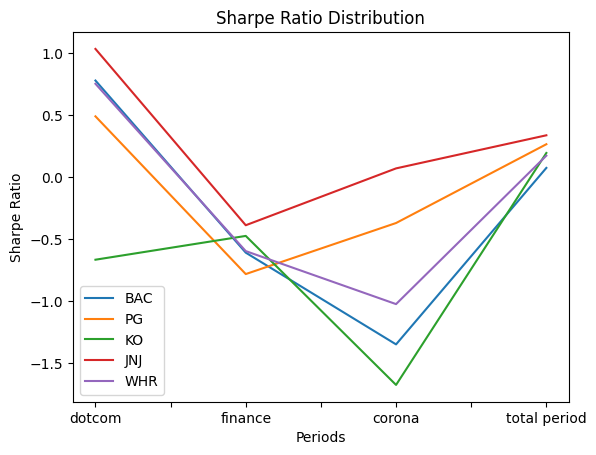

In [ ]:
SP_df.plot()
plt.title("Sharpe Ratio Distribution")
plt.ylabel("Sharpe Ratio")
plt.xlabel("Periods")

**Interpreatation**:
- Considering my riskprofile I would always choose the stock with the maximum sharp ratio. Since JNJ dominates the other stocks in terms of sharpe ratio in each crisis as well as for the entire period, I would opt for JNJ. Altough the sharpe ratio of JNJ is not optimal in every crisis, its still the best in comparison to the others.

- we should keep in mind that this is only about crisis and the whole period. As we have seen in task 3, the mean value of JNJ has fallen sharply in the "post dotcom" period. In addition the variance has risen dramatically. These two occurences normaly indicate a crisis period. So this analysis of the sharpe ratio does not include a individual crisis in a "non-crisis" period.